# Análise de Imagens da Floresta Amazônica

# Contextualização

Considerando o alto número de florestas sendo derrubadas nesse instante, seguimos com o projeto proposto e analisamos os dados diponibilizados no dataset Kagle. A ideia era tentar uma leitura mais clara que possibilizasse uma análise melhor das imagens capturadas via satélite, tendo em vista que elas são muito grosseiras e dificeis de compreender o que de fato é área desmatada de mata intocada por ação humana

# Renomeando todas as imagens uitilizadas do Dataset

```python


import os
os.chdir(r"train-jpg")
print(os.getcwd())
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = str(count)
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
```

# Bibliotecas utilizadas

In [3]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from colormap import rgb2hex
from sklearn.cluster import KMeans

# Aqui estão as estruturas de repetição

Elas foram utilizadas para extrair as imagens da pasta, além disso as imagens foram covertidas para RGB para que pudessemos analizá-las. Extraimos o máximo de imagens possiveis considerando o poder computacional que possuimos. 

In [2]:
# Estrutura de Repetição para extrair as imagens da pasta;
# As imagens são extraídas no formato BGR e são convertidas para RGB;
# Extraímos 4096 imagens porque foi o que os computadores aguentaram;
lista_imagens = []
num = 0
for i in range(0, 4096):
    image = cv2.imread(r'train-jpg\{}.jpg'.format(num))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    lista_imagens.append(image)
    num += 1 

# Transformando a lista de imagens em um Array;
lista_imagens = np.array(lista_imagens)

# Redimensionando o dataset para conseguir treinar o modelo

In [3]:
# Redimensionando o dataset para conseguir treinar o modelo;
lista_imagens = lista_imagens.reshape((16384 * 16384, 3))

*Utilizamos o K-means para agrupar as cores em três clusters, este ponto demora consideravelmente para rodar*

In [4]:
# Usando o KMeans para agrupar as milhares de cores em 3 clusters;
# ATENÇÃO: Demora bastante;
clt = KMeans(n_clusters = 3)
clt.fit(lista_imagens)

KMeans(n_clusters=3)

# Fizemos algumas adequações para criar o histograma. 

In [5]:
# Usa o centróide para criar um histograma, baseado no número de pixels de cada cluster;
def histograma(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # Normalizando o histograma;
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

# Mostra a porcentagem de cada cor no histograma;
def cores(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # Estrutura de Repetição para conseguir a porcentagem das cores em cada cluster;
    for (percent, color) in zip(hist, centroids):
        # Mostra a porcentagem relativa de cada cluster;
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

# Criação do histograma.

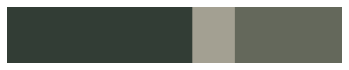

In [6]:
# Plotando o histograma;
hist = histograma(clt)
bar = cores(hist, clt.cluster_centers_)
# Mostrando a barra;
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.savefig("cores_4096.png",dpi = 500)
plt.show()

In [7]:
# Extraindo as cores da imagem;
import extcolors
colors_x, pixel_count = extcolors.extract_from_path("cores_4096.png", tolerance = 12, limit=12)
colors_x

[((50, 61, 53), 498968), ((100, 104, 91), 288672), ((163, 160, 146), 114460)]

# Criação de um loop para extrair apenas valores RGB da lista

In [8]:
# Loop para extrair apenas os valores RGB da lista acima
R = []
G = []
B = []

num = 0
for i in range(0,len(colors_x)):
    a = colors_x[num][0][0]
    b = colors_x[num][0][1]
    c = colors_x[num][0][2]
    R.append(a)
    G.append(b)
    B.append(c)
    num+=1
print(R, G, B)

[50, 100, 163] [61, 104, 160] [53, 91, 146]


# Transformando os valores RGB em HEX

In [9]:
# Loop para transformar os valores RGB em HEX
num = 0
lista_hex = []
for i in range(0, len(colors_x)):
    colors = rgb2hex(R[num],G[num],B[num])
    lista_hex.append(colors)
    num += 1
lista_hex

['#323D35', '#64685B', '#A3A092']

# Extraindo a frequência de cada cor

In [10]:
# Loop para extrair a frequência de cada cor
lista_occ = []
num = 0
for i in range(0, len(colors_x)):
    a = colors_x[num][1]
    lista_occ.append(a)
    num += 1
lista_occ

[498968, 288672, 114460]

# Criando o gráfico de setores

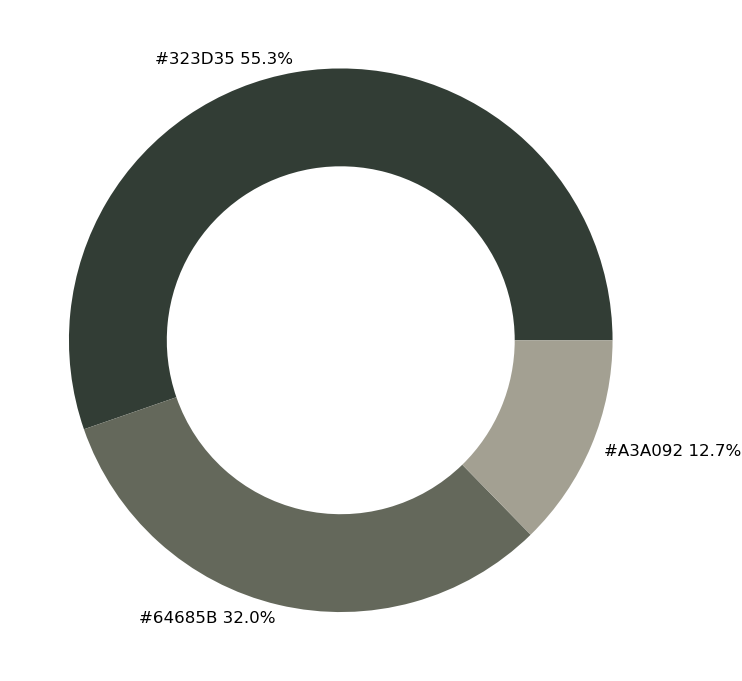

In [14]:
# Plotando o gráfico de setores
text_c = [c + ' ' + str(round(p*100/sum(lista_occ),1)) +'%' for c, p in zip(lista_hex,
                                                                               lista_occ)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(lista_occ,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = lista_hex,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

---

# Conclusão

Com isto, podemos analisar as imagens e calcular a porcentagem de desmatamento que ocorreu na região da Amazônia nos ultimos anos. 

# Referências:

https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e

https://pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/